# ОИАД. Лабораторная работа №4

Используйте набор данных **datasets/famcs_students.csv**

binary_cols = [ss, interest, weekend_study, bad_sleep, glasses, anime, study_form, literature]

Исползуйте целевую переменную $y=$ binary_cols[N % 8], где $N$ - номер в списке группы. Остальные переменные используйте в качестве признаков $X$ (предикторов). Вы можете отобрать наиболее информативные (по вашему экспертному мнению) признаки, но не менее 5.

Необходимо построить несколько моделей бинарной классификации $y$ по признакам $X$.

Разделите случайно исходные данные на 3 выборки:
* тренировочная (70%) - для определения параметров модели
* валидацонная (15%) - для подбора гиперпараметров модели
* тестовую (15%) - итоговая оценка качества

## 0. Тривиальный классификатор
Всегда выдает наиболее частый класс

## 1. Наивный байесовский классификатор
Алгоритм реализуйте сами!

## 2. Метод k-ближайших соседей
Алгоритм реализуйте сами!
Подберите оптимальный гиперпараметр $k$.

## 3. Логистическая регрессия
Алгоритм реализуйте сами!
Изобразите график зависимости метрик precision, recall от порога классификаци, а итоговый порог классификации выберите таким, при котором достигается максимум метрики f1. Используйте валидационную выборку.

## 4. Оценка качества
Для каждой построенной модели, по отложенной тестовой выборке оцените качество моделей:
* accuracy
* precision
* recall
* roc-auc
* постройте матрицу ошибок
  



In [1]:
N = 16
binary_cols = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'anime', 'study_form', 'literature']
target_col = binary_cols[N % 8]
print(target_col)

ss


In [2]:
import numpy as np
import pandas as pd
full = pd.read_csv('famcs_students.csv')

print(full)

     cource  group                  stream sex   age   ss          interest  \
0         4     11  Прикладная информатика   М  20.0  Нет        Математика   
1         4     11  Прикладная информатика   Ж  20.0  Нет  Программирование   
2         4     11  Прикладная информатика   Ж  19.0  Нет  Программирование   
3         4     11  Прикладная информатика   Ж  20.0  Нет        Математика   
4         4     11  Прикладная информатика   М  20.0  Нет        Математика   
..      ...    ...                     ...  ..   ...  ...               ...   
122       4      1             Информатика   М  20.0  Нет  Программирование   
123       4      1             Информатика   Ж  22.0  Нет  Программирование   
124       4      1             Информатика   М  21.0  Нет        Математика   
125       4      1             Информатика   М  20.0  Нет  Программирование   
126       4      1             Информатика   М  20.0  Нет  Программирование   

          os weekend_study bad_sleep  ...      soci

In [3]:
def get_categorical_columns(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

print(get_categorical_columns(full))

['stream', 'sex', 'ss', 'interest', 'os', 'weekend_study', 'bad_sleep', 'glasses', 'work_experience', 'ai', 'anime', 'social', 'sport', 'study_form', 'eye_color', 'retake', 'hostel', 'literature']


In [18]:
# Превращает категории в бинарные столбцы, чтобы их можно было использовать в моделях
def one_hot_encode(df, cat_cols = None, drop_first = True):
    if cat_cols is None:
        cat_cols = get_categorical_columns(df)
    df2 = df.copy()
    df2 = pd.get_dummies(df2, columns=cat_cols, drop_first=drop_first,  dtype=int)
    return df2

full_encoded = one_hot_encode(full)
print(full_encoded)

     cource  group   age  height  miss  foot_size  score  \
0         4     11 20.00  192.00  3.00      48.00   9.20   
1         4     11 20.00  169.00  5.00      39.00   8.80   
2         4     11 19.00  190.00 10.00      41.00   8.80   
3         4     11 20.00  158.00  3.00      36.00   8.80   
4         4     11 20.00  187.00  1.00      46.00   9.00   
..      ...    ...   ...     ...   ...        ...    ...   
122       4      1 20.00  185.00  1.00      45.00   6.29   
123       4      1 22.00  169.00  0.00      39.00   6.00   
124       4      1 21.00  183.00 10.00      44.00   7.00   
125       4      1 20.00  187.00  1.00      45.00   7.00   
126       4      1 20.00  186.00 10.00      43.00   6.00   

     stream_Прикладная информатика  stream_Прикладная математика  sex_М  ...  \
0                                1                             0      1  ...   
1                                1                             0      0  ...   
2                                1     

In [17]:
def compute_correlations(df, method = 'pearson'):
    num_df = df.select_dtypes(include=[np.number])
    corr = num_df.corr(method=method)
    return corr

#===============================================
pd.options.display.float_format = '{:.2f}'.format
#===============================================

print("Pearson")
pearson = compute_correlations(full_encoded)
print(pearson)


Pearson
                                 cource  group   age  height  miss  foot_size  \
cource                             1.00  -0.09  0.15   -0.01  0.04      -0.06   
group                             -0.09   1.00 -0.04    0.05 -0.06      -0.01   
age                                0.15  -0.04  1.00   -0.26  0.18      -0.09   
height                            -0.01   0.05 -0.26    1.00 -0.03       0.84   
miss                               0.04  -0.06  0.18   -0.03  1.00       0.07   
foot_size                         -0.06  -0.01 -0.09    0.84  0.07       1.00   
score                              0.07   0.20 -0.28    0.23 -0.52       0.05   
stream_Прикладная информатика      0.17   0.94 -0.02    0.03 -0.05      -0.03   
stream_Прикладная математика      -1.00   0.09 -0.15    0.01 -0.04       0.06   
sex_М                             -0.08  -0.08  0.00    0.54  0.19       0.76   
ss_Нет                             0.04   0.04  0.13    0.04  0.05       0.14   
interest_Программиро

In [ ]:
import numpy as np
import pandas as pd

def find_strong_correlations(corr_matrix, target_prefix, threshold=0.5): #порог корреляции, сильные связи
    target_cols = [c for c in corr_matrix.columns if c.startswith(target_prefix)]
    if not target_cols:
        raise ValueError(f"Не найдены колонки, начинающиеся с '{target_prefix}'")

    results = []
    for target in target_cols:
        correlations = corr_matrix[target].drop(target, errors='ignore')
        strong_corrs = correlations[correlations.abs() > threshold]
        for feat, corr_val in strong_corrs.items():
            results.append({'target_col': target, 'feature': feat, 'correlation': corr_val})
    
    result_df = pd.DataFrame(results)
    if not result_df.empty:
        result_df = result_df.sort_values(by='correlation', key=np.abs, ascending=False)
    return result_df
    
strong_corrs = find_strong_correlations(pearson, target_prefix='ss', threshold=0.0)
print(strong_corrs)


   target_col                          feature  correlation
23     ss_Нет                        ai_Gemini        -0.27
13     ss_Нет                weekend_study_Нет         0.19
31     ss_Нет                        anime_Нет        -0.15
5      ss_Нет                        foot_size         0.14
2      ss_Нет                              age         0.13
15     ss_Нет                      glasses_Нет        -0.13
25     ss_Нет                          ai_Grok        -0.11
32     ss_Нет                  social_Социофоб         0.09
27     ss_Нет                          ai_Qwen         0.09
22     ss_Нет                      ai_DeepSeek         0.08
41     ss_Нет                        retake_2+        -0.08
20     ss_Нет                       ai_Copilot         0.07
37     ss_Нет                eye_color_Зеленые        -0.07
44     ss_Нет                   literature_Нет         0.07
19     ss_Нет                        ai_Claude         0.06
14     ss_Нет                    bad_sle

# Разделите случайно исходные данные на 3 выборки:

тренировочная (70%) - для определения параметров модели

валидацонная (15%) - для подбора гиперпараметров модели

тестовую (15%) - итоговая оценка качества

In [20]:
# Разделение данных на X и y, кодирование категорий и разбиение на train/val/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Берём все признаки, кроме целевой переменной
X = full.drop(columns=[target_col])  # признаки

# Берём столбец, который нужно предсказывать
y = full[target_col]  # целевая переменная

# Кодируем категориальные признаки X в 0/1 (one-hot encoding)
X = pd.get_dummies(X)

# Кодируем y (если она строковая) в 0 и 1
if y.dtype == "object":
    y = LabelEncoder().fit_transform(y)

# Делим данные: 70% — train, 30% — временная выборка
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=123, stratify=y
)

# Делим временную выборку пополам: 15% — val, 15% — test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=321, stratify=y_temp
)

# Приводим данные к типу float, чтобы модели могли работать
X_train = X_train.astype(float)
X_val = X_val.astype(float)
X_test = X_test.astype(float)

# Показываем размеры выборок
print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

#print(X_train)

Train: 88, Val: 19, Test: 20


# 0. Тривиальный классификатор¶
Всегда выдает наиболее частый класс

In [23]:
class TrivialClassifier:
    def fit(self, y):
        # Ищем самый частый класс в y
        values, counts = np.unique(y, return_counts=True)
        self.most_common = values[np.argmax(counts)]

    def predict(self, X):
        # Возвращаем самый частый класс для всех объектов
        return np.full(len(X), self.most_common)

In [ ]:
from sklearn.metrics import accuracy_score

trivial = TrivialClassifier()          # создаём тривиальную модель
trivial.fit(y_train)                   # находим самый частый класс в обучающей выборке
y_pred_trivial = trivial.predict(X_test)  # предсказываем этот класс для всех объектов теста
print("Trivial accuracy:", accuracy_score(y_test, y_pred_trivial))


Trivial accuracy: 0.9


# Показатель 0.9 получился из-за дисбаланса классов: один класс встречается в ~90% случаев.

## 1. Наивный байесовский классификатор
Алгоритм реализуйте сами!

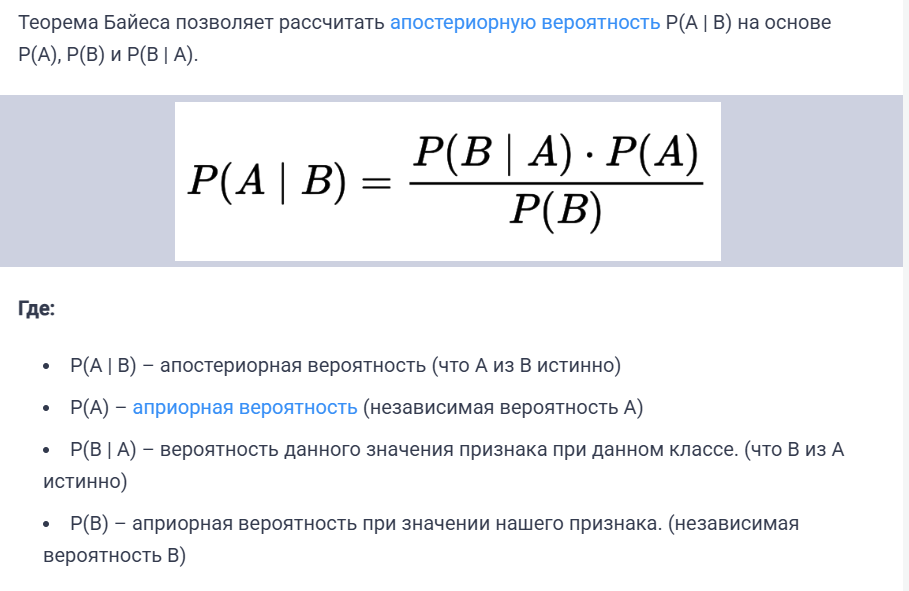

# Функция распределения вероятности:

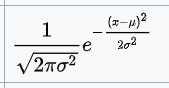

В предикте для каждого класса c:
1. Приоритет
$logP(y=c)$
2. Likelihood (условная вероятность признаков)
$P(x \mid y=c) = \prod_{j=1}^{n} P(x_j \mid y=c)$
3. Складывает приоритет + likelihood

Потом выбирает класс с максимальной апостериорной вероятностью

In [25]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)

        # априорные вероятности классов P(c)
        self.priors = {c: np.mean(y == c) for c in self.classes}

        # средние значения признаков для каждого класса (μ)
        self.mean = {c: X[y == c].mean(axis=0) for c in self.classes}

        # дисперсии признаков (σ²) + маленькое число, чтобы не делить на 0
        self.var = {c: X[y == c].var(axis=0) + 1e-6 for c in self.classes}  

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]

        # формула экспоненты normal pdf: exp(-(x-μ)² / (2σ²))
        numerator = np.exp(pd.to_numeric(- (x - mean) ** 2 / (2 * var)))

        # корень из (2πσ²) — знаменатель нормального распределения
        denominator = np.sqrt(2 * np.pi * var)

        return numerator / denominator

    def _predict_single(self, x):
        posteriors = []
        for c in self.classes:

            # log(P(c)) — логарифм априорной вероятности класса
            prior = np.log(self.priors[c])

            # сумма логарифмов правдоподобия для всех признаков
            likelihood = np.sum(np.log(self._pdf(c, x)))

            # итоговая лог-вероятность класса
            posteriors.append(prior + likelihood)

        # выбираем класс с максимальной лог-вероятностью
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        # предсказываем класс для каждого объекта
        return np.array([self._predict_single(x) for x in X.values])


np.seterr(divide='ignore')
np.seterr(over='ignore')

nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes accuracy: 0.35


# Accuracy наивного Байеса составила 0.35, что значительно ниже результата тривиального классификатора. 
Это означает, что модель не справляется с задачей и хуже угадывает класс, чем простое предсказание 
самого частого класса.


## 2. Метод k-ближайших соседей
Алгоритм реализуйте сами!
Подберите оптимальный гиперпараметр $k$.

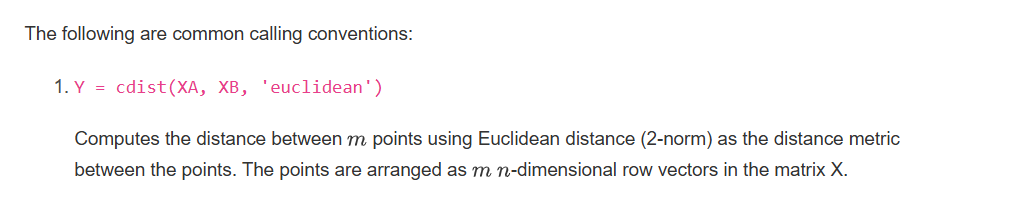
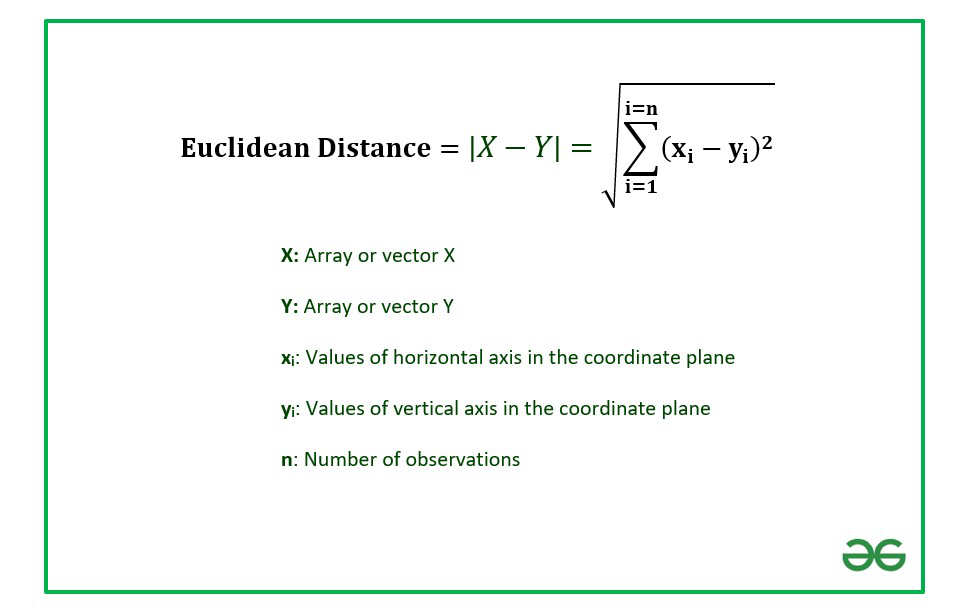

kNN:
# При предсказании объекта  мы:

1. Ищем k ближайших соседей из обучающей выборки
2. Берём их классы
3. Выбираем класс большинства


# Для поиска оптимального k мы пробегаемся через все k и смотрим accuracy на валидационном сете

In [26]:
from scipy.spatial.distance import cdist

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        # сохраняем обучающие данные как массивы
        self.X_train = X.values
        self.y_train = y

    def predict(self, X):
        # матрица расстояний от каждого тестового объекта до всех обучающих
        distances = cdist(X.values, self.X_train, metric='euclidean')

        # индексы k ближайших соседей для каждого объекта
        neighbors_idx = np.argsort(distances, axis=1)[:, :self.k]

        # метки классов этих соседей
        neighbors_labels = self.y_train[neighbors_idx]

        # голосование: выбираем самый частый класс среди k соседей
        y_pred = [np.bincount(row).argmax() for row in neighbors_labels]

        return np.array(y_pred)


best_k = None
best_acc = 0

# перебираем k от 1 до 20 — подбор оптимального k по валидации
for k in range(1, 21):
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)

    # считаем качество на валидационной выборке
    acc = accuracy_score(y_val, y_val_pred)

    # сохраняем лучшее k
    if acc > best_acc:
        best_acc = acc
        best_k = k


print(f"Best k = {best_k} (val accuracy = {best_acc:.3f})")

# обучаем лучшую модель с оптимальным k
knn_best = KNN(k=best_k)
knn_best.fit(X_train, y_train)

# итоговое качество на тесте
y_pred_knn = knn_best.predict(X_test)
print("KNN test accuracy:", accuracy_score(y_test, y_pred_knn))


Best k = 5 (val accuracy = 0.895)
KNN test accuracy: 0.9


Оптимальным значением гиперпараметра k оказался k=5, при котором 
валидационная точность составила 0.895. 
После обучения модели с этим k итоговая точность на тестовой выборке 
оказалась равной 0.90, что сопоставимо с тривиальным классификатором.



## 3. Логистическая регрессия
Алгоритм реализуйте сами!
Изобразите график зависимости метрик precision, recall от порога классификаци, а итоговый порог классификации выберите таким, при котором достигается максимум метрики f1. Используйте валидационную выборку.


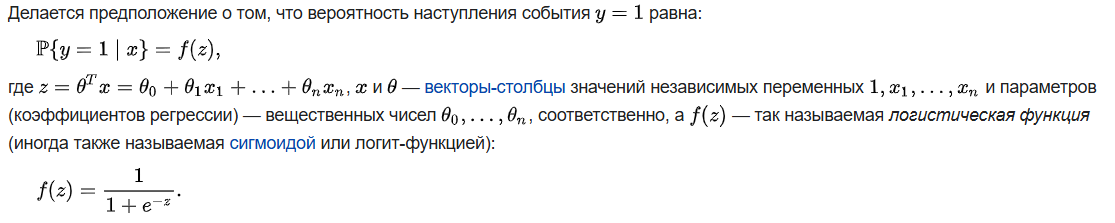

# Минимизируем функцию кроссэнтропии:

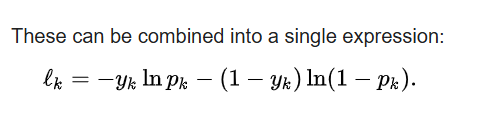

In [27]:
class LogisticRegression:
    def __init__(self, lr=0.01, n_iter=5000):
        self.lr = lr
        self.n_iter = n_iter

    def sigmoid(self, z):
        # сигмоид — переводит любое число в диапазон (0, 1)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # добавляем столбец единиц — bias (w0)
        X = np.c_[np.ones(X.shape[0]), X]

        # инициализируем веса нулями
        self.weights = np.zeros(X.shape[1])

        # градиентный спуск
        for _ in range(self.n_iter):
            z = X @ self.weights                  # линейная комбинация Xw
            preds = self.sigmoid(z)              # прогноз вероятностей
            gradient = X.T @ (preds - y) / len(y) # градиент функции потерь
            self.weights -= self.lr * gradient    # обновление весов

    def predict_proba(self, X):
        # снова добавляем bias при предсказании
        X = np.c_[np.ones(X.shape[0]), X]
        return self.sigmoid(X @ self.weights)    # выдаём вероятности (0..1)

    def predict(self, X, threshold=0.5):
        # сравниваем вероятность с порогом → получаем 0/1
        return (self.predict_proba(X) >= threshold).astype(int)


# обучение
logreg = LogisticRegression(lr=0.00001, n_iter=6000)
logreg.fit(X_train.values, y_train)

# тестовое предсказание
y_pred_logreg = logreg.predict(X_test)
print("logreg test accuracy:", accuracy_score(y_test, y_pred_logreg))

# вероятности для валидации — нужны для подбора порога
val_proba = logreg.predict_proba(X_val.values)
print(val_proba)


logreg test accuracy: 0.9
[0.90969858 0.84972133 0.86571908 0.91083123 0.9021062  0.90031657
 0.85806822 0.89029376 0.88110644 0.86575875 0.8828412  0.8975995
 0.89301255 0.88381206 0.87215235 0.89703592 0.86812718 0.89149653
 0.82904813]


Логистическая регрессия показала accuracy = 0.9 на тестовой выборке, 
что сопоставимо с тривиальным классификатором из-за сильного дисбаланса классов. 
Таким образом, по одной только accuracy нельзя судить о реальном качестве модели.


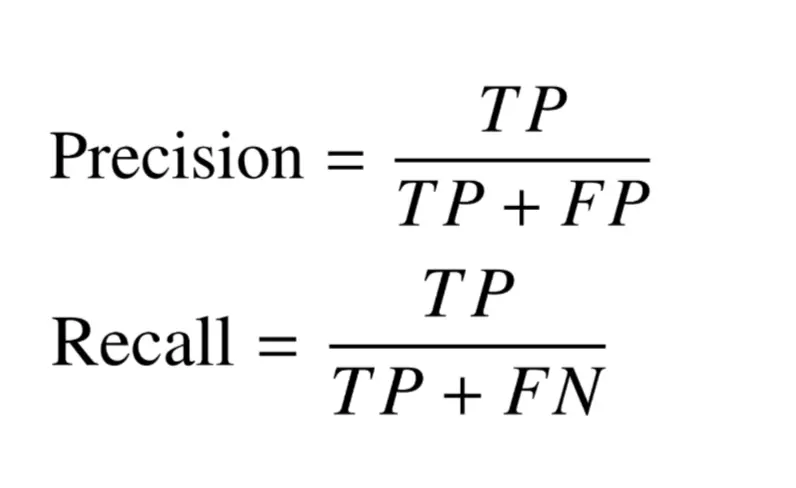

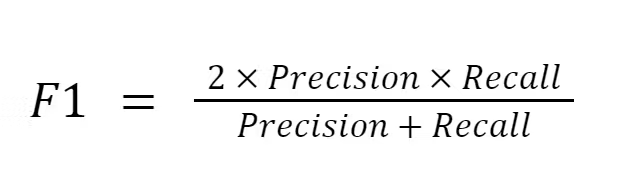

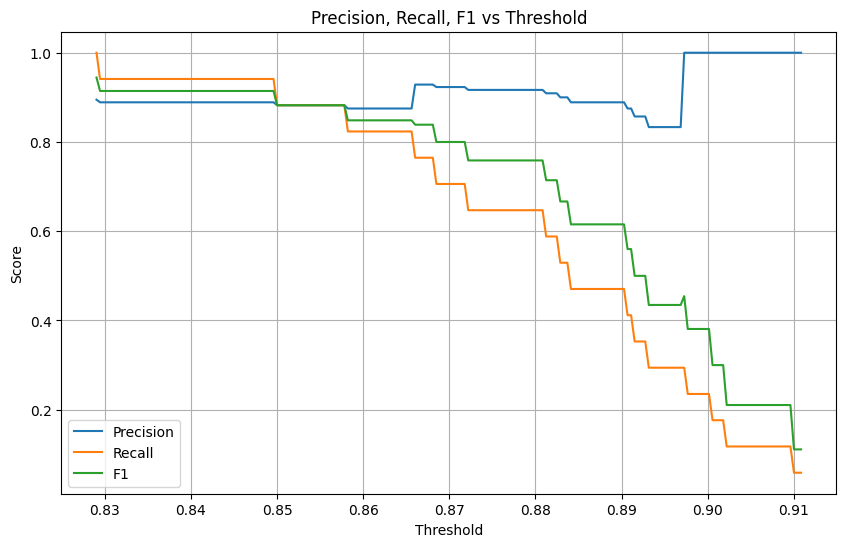

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# создаём 200 порогов между минимальной и максимальной предсказанной вероятностью
thresholds = np.linspace(min(val_proba), max(val_proba), 200)

precisions = []
recalls = []
f1_scores = []

for t in thresholds:
    # превращаем вероятности в 0/1 по текущему порогу t
    preds = (val_proba >= t).astype(int)

    # считаем precision, recall, f1 для этого порога
    precisions.append(precision_score(y_val, preds, zero_division=0.0))
    recalls.append(recall_score(y_val, preds))
    f1_scores.append(f1_score(y_val, preds))

# графики метрик от порога
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1_scores, label="F1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, F1 vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


График показывает, как изменяются метрики Precision, Recall и F1 при разных значениях порога классификации. 
При низких порогах (≈0.83–0.85) метрика F1 достигает максимума, так как модель чаще предсказывает класс 1 
и сохраняет высокий Recall. По мере увеличения порога Recall резко падает, что приводит к снижению F1, 
в то время как Precision остаётся почти неизменной. Таким образом, оптимальный порог следует выбирать в 
области 0.83–0.85, где метрика F1 является максимальной.


In [29]:
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold = {best_threshold:.3f}, F1 = {f1_scores[best_idx]:.3f}")


Best threshold = 0.829, F1 = 0.944


Оптимальный порог классификации составил 0.829, при котором достигается максимальная 
метрика F1 = 0.944. Это означает, что именно при таком пороге модель показывает лучший 
баланс между Precision и Recall на валидационной выборке. Стандартный порог 0.5 
в данном случае не подходит из-за сильного дисбаланса классов, поэтому выбор порога 
по максимуму F1 позволяет значительно улучшить качество классификации.


## 4. Оценка качества
Для каждой построенной модели, по отложенной тестовой выборке оцените качество моделей:
* accuracy
* precision
* recall
* roc-auc
* постройте матрицу ошибок

Кривая ROC строится путем вычисления истинно положительного уровня (TPR) и ложноположительного уровня (FPR) при каждом возможном пороге (на практике, в выбранных интервалах), а затем построения графика TPR по FPR. Идеальная модель, которая при некотором пороге имеет TPR 1,0 и FPR 0,0, может быть представлена ​​либо точкой в ​​(0, 1), если все остальные пороги игнорируются, либо следующим образом

Площадь под ROC-кривой (AUC) представляет собой вероятность того, что модель, если ей дать случайно выбранные положительный и отрицательный пример, оценит положительный пример выше, чем отрицательный.

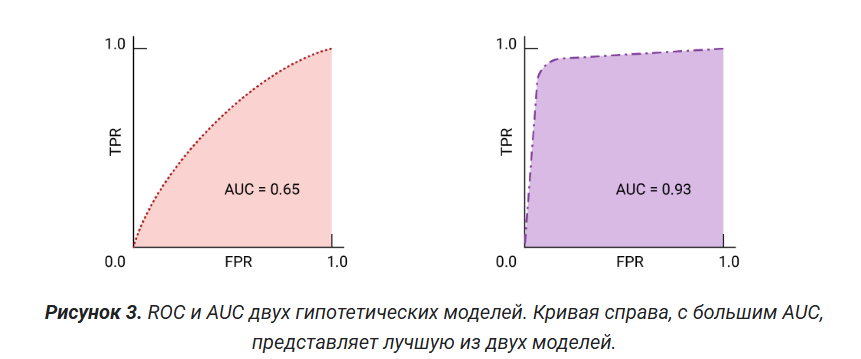

In [30]:
def evaluate_model(name, y_true, y_pred, y_proba=None):
    print("======================================================")
    print(f"========================{name}=======================")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0.0))
    print("Recall:", recall_score(y_true, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_true, y_proba))

    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print("\nConfusion Matrix:")
    print("+------------------+----------------+----------------+")
    print("|                  | Predicted no   | Predicted yes  |")
    print("+------------------+----------------+----------------+")
    print(f"| Actual No        | {tn:6d} (TN)    | {fp:6d} (FP)    |")
    print(f"| Actual Yes       | {fn:6d} (FN)    | {tp:6d} (TP)    |")
    print("+------------------+----------------+----------------+")
    print("======================================================")

In [32]:
evaluate_model("Trivial",
               y_test,
               y_pred_trivial)

========================Trivial=======================
Accuracy: 0.9
Precision: 0.9
Recall: 1.0

Confusion Matrix:
+------------------+----------------+----------------+
|                  | Predicted no   | Predicted yes  |
+------------------+----------------+----------------+
| Actual No        |      0 (TN)    |      2 (FP)    |
| Actual Yes       |      0 (FN)    |     18 (TP)    |
+------------------+----------------+----------------+


In [31]:
evaluate_model("Naive Bayes",
               y_test,
               y_pred_nb)


========================Naive Bayes=======================
Accuracy: 0.35
Precision: 0.7777777777777778
Recall: 0.3888888888888889

Confusion Matrix:
+------------------+----------------+----------------+
|                  | Predicted no   | Predicted yes  |
+------------------+----------------+----------------+
| Actual No        |      0 (TN)    |      2 (FP)    |
| Actual Yes       |     11 (FN)    |      7 (TP)    |
+------------------+----------------+----------------+


In [33]:
evaluate_model("kNN",
               y_test,
               y_pred_knn)

========================kNN=======================
Accuracy: 0.9
Precision: 0.9
Recall: 1.0

Confusion Matrix:
+------------------+----------------+----------------+
|                  | Predicted no   | Predicted yes  |
+------------------+----------------+----------------+
| Actual No        |      0 (TN)    |      2 (FP)    |
| Actual Yes       |      0 (FN)    |     18 (TP)    |
+------------------+----------------+----------------+


In [38]:
test_proba = logreg.predict_proba(X_test.values)
evaluate_model("Logistic Regression",
               y_test,
               y_pred_logreg,
               y_proba=test_proba)

========================Logistic Regression=======================
Accuracy: 0.9
Precision: 0.9
Recall: 1.0
ROC-AUC: 0.41666666666666663

Confusion Matrix:
+------------------+----------------+----------------+
|                  | Predicted no   | Predicted yes  |
+------------------+----------------+----------------+
| Actual No        |      0 (TN)    |      2 (FP)    |
| Actual Yes       |      0 (FN)    |     18 (TP)    |
+------------------+----------------+----------------+


In [37]:
y_pred_logreg_best = logreg.predict(X_test, best_threshold)
evaluate_model("Logistic Regression",
               y_test,
               y_pred_logreg_best,
               y_proba=test_proba)

========================Logistic Regression=======================
Accuracy: 0.9
Precision: 0.9
Recall: 1.0
ROC-AUC: 0.41666666666666663

Confusion Matrix:
+------------------+----------------+----------------+
|                  | Predicted no   | Predicted yes  |
+------------------+----------------+----------------+
| Actual No        |      0 (TN)    |      2 (FP)    |
| Actual Yes       |      0 (FN)    |     18 (TP)    |
+------------------+----------------+----------------+
